In [1]:
# Source: http://brandonrose.org/clustering

import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
!pip install mpld3
import mpld3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.2/201.2 KB 6.3 MB/s eta 0:00:00


In [2]:
# Get all the lists we need.
# Source: https://stackoverflow.com/a/24662707

import csv

#with open('scraped_pattern_data_gofpatterns_revised.csv', newline='') as f:
# with open('GoF problem domain (complete).csv', newline='') as f:
#     reader = csv.reader(f)
#     list_gof = list(reader)
#     list_gof.pop(0)
#     list_gof = np.array(list_gof)
#     #id_gof = list_gof[:,0]
#     #cat_gof = list_gof[:,1]
#     #name_gof = list_gof[:,2]
#     #overview_gof = list_gof[:,3]
#     name_gof = list_gof[:,0]
#     cat_gof = list_gof[:,1]
#     #overview_gof = np.concatenate((np.concatenate((list_gof[:,1], list_gof[:,2])), list_gof[:,3]))
#     overview_gof = np.sum(list_gof[2:4], axis = 1)

# print(overview_gof)

df_patterns = pd.read_csv("GoF problem domain (complete).csv")
#df_patterns.pop(df_patterns.columns[-1]) #delete the last empty, unnamed column
#create an overview column
df_patterns['overview'] = df_patterns['intent'] + " " + df_patterns['motivation'] + " " + df_patterns['applicability']
print(df_patterns)

                       name  correct_category  \
0          abstract factory                 2   
1                   builder                 2   
2            factory method                 2   
3                 prototype                 2   
4                 singleton                 2   
5                   adapter                 1   
6                    bridge                 1   
7                 composite                 1   
8                 decorator                 1   
9                    facade                 1   
10                flyweight                 1   
11                    proxy                 1   
12  chain of responsibility                 0   
13                  command                 0   
14              interpreter                 0   
15                 iterator                 0   
16                 mediator                 0   
17                  memento                 0   
18                 observer                 0   
19                  

In [3]:
# load nltk's English stopwords as variable called 'stopwords'
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [5]:
# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [6]:
nltk.download('punkt')

#not super pythonic, no, not at all.
#use extend so it's a big flat list of vocab
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in df_patterns['overview']:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'synopses', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [7]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

there are 12561 items in vocab_frame


In [8]:
print(vocab_frame.head())
print
print
print
print

              words
provid      provide
an               an
interfac  interface
for             for
creat      creating


<function print>

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(df_patterns['overview']) #fit the vectorizer to synopses

print(tfidf_matrix.shape)

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  warnings.warn(


CPU times: user 565 ms, sys: 11.6 ms, total: 576 ms
Wall time: 889 ms
(23, 152)


In [10]:
terms = tfidf_vectorizer.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [11]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)
print
print

<function print>

In [12]:
from sklearn.cluster import KMeans

num_clusters = 3

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters_gof = km.labels_.tolist()

CPU times: user 294 ms, sys: 4.16 ms, total: 298 ms
Wall time: 409 ms


In [13]:
#!pip install sklearn
#from sklearn.externals import joblib
#import sklearn.external.joblib as extjoblib
import joblib

#uncomment the below to save your model 
#since I've already run my model I am loading from the pickle

joblib.dump(km,  'doc_cluster.pkl')

km = joblib.load('doc_cluster.pkl')
clusters_gof = km.labels_.tolist()

In [14]:
#patterns_gof = { 'id': id_gof, 'cat': cat_gof, 'name': name_gof, 'overview': overview_gof, 'cluster': clusters_gof }
patterns_gof = { 'name': df_patterns['name'], 'cat': df_patterns['correct_category'], 'overview': df_patterns['overview'], 'cluster': clusters_gof }
print(patterns_gof)

frame_gof = pd.DataFrame(patterns_gof, index = [clusters_gof] , columns = ['name', 'cat', 'cluster'])

{'name': 0            abstract factory
1                     builder
2              factory method
3                   prototype
4                   singleton
5                     adapter
6                      bridge
7                   composite
8                   decorator
9                      facade
10                  flyweight
11                      proxy
12    chain of responsibility
13                    command
14                interpreter
15                   iterator
16                   mediator
17                    memento
18                   observer
19                      state
20                   strategy
21            template method
22                    visitor
Name: name, dtype: object, 'cat': 0     2
1     2
2     2
3     2
4     2
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
Name: correct_category, dtype: int64, 'overview': 0     Provide an interface for cr

In [15]:
frame_gof['cluster'].value_counts() #number of patterns per cluster (clusters from 0 to 2)

0    13
1     7
2     3
Name: cluster, dtype: int64

In [16]:
#grouped = frame_gof['id'].groupby(frame_gof['cluster']) #groupby cluster for aggregation purposes

#grouped.mean() #average id per cluster

In [17]:
from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print(' %s' % vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print() #add whitespace
    print() #add whitespace
    
    print("Cluster %d titles:" % i, end='')
    for title in frame_gof.loc[i]['name'].values.tolist():
        print(' %s,' % title, end='')
    print() #add whitespace
    print() #add whitespace
    
print()
print()

Top terms per cluster:

Cluster 0 words: b'interface', b'clients', b'define', b'subclasses', b'access', b'windows',

Cluster 0 titles: nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

Cluster 1 words: b'document', b'creating', b'subclasses', b'application', b'request', b'instantiating',

Cluster 1 titles: nan, nan, nan, nan, nan, nan, nan,

Cluster 2 words: b'state', b'change', b'dependent', b'data', b'user', b'any',

Cluster 2 titles: nan, nan, nan,





In [18]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

In [19]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3'}

#set up cluster names using a dict
cluster_names = {0: 'cluster 0', 
                 1: 'cluster 1', 
                 2: 'cluster 2'}

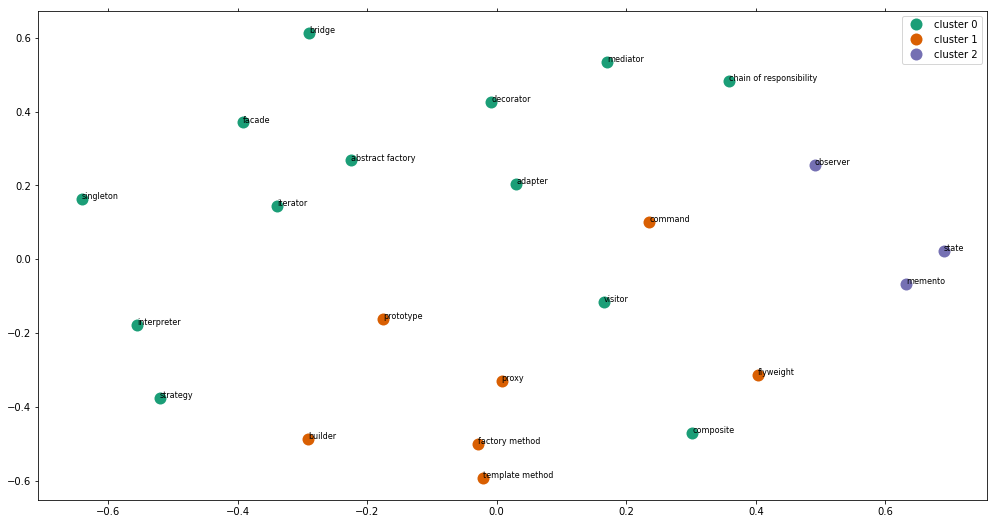

<Figure size 432x288 with 0 Axes>

In [20]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df_gof = pd.DataFrame(dict(x=xs, y=ys, label=clusters_gof, name=df_patterns['name'])) 

#group by cluster
groups = df_gof.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df_gof)):
    ax.text(df_gof.loc[i]['x'], df_gof.loc[i]['y'], df_gof.loc[i]['name'], size=8)  

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
plt.savefig('clusters_small_noaxes.png', dpi=200)

In [21]:
plt.close()

In [22]:
#define custom toolbar location
class TopToolbar(mpld3.plugins.PluginBase):
    """Plugin for moving toolbar to top of figure"""

    JAVASCRIPT = """
    mpld3.register_plugin("toptoolbar", TopToolbar);
    TopToolbar.prototype = Object.create(mpld3.Plugin.prototype);
    TopToolbar.prototype.constructor = TopToolbar;
    function TopToolbar(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    TopToolbar.prototype.draw = function(){
      // the toolbar svg doesn't exist
      // yet, so first draw it
      this.fig.toolbar.draw();

      // then change the y position to be
      // at the top of the figure
      this.fig.toolbar.toolbar.attr("x", 150);
      this.fig.toolbar.toolbar.attr("y", 400);

      // then remove the draw function,
      // so that it is not called again
      this.fig.toolbar.draw = function() {}
    }
    """
    def __init__(self):
        self.dict_ = {"type": "toptoolbar"}

In [23]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df_gof = pd.DataFrame(dict(x=xs, y=ys, label=clusters_gof, name=df_patterns['name']))

#group by cluster
groups = df_gof.groupby('label')

#define custom css to format the font and to remove the axis labeling
css = """
text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }

svg.mpld3-figure {
margin-left: -200px;}
"""

# Plot 
fig, ax = plt.subplots(figsize=(14,6)) #set plot size
ax.margins(0.03) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    points = ax.plot(group.x, group.y, marker='o', linestyle='', ms=18, 
                     label=cluster_names[name], mec='none', 
                     color=cluster_colors[name])
    ax.set_aspect('auto')
    labels = [i for i in group.name]
    
    #set tooltip using points, labels and the already defined 'css'
    tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                       voffset=10, hoffset=10, css=css)
    #connect tooltip to fig
    mpld3.plugins.connect(fig, tooltip, TopToolbar())    
    
    #set tick marks as blank
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    
    #set axis as blank
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    
ax.legend(numpoints=1) #show legend with only one dot

mpld3.display() #show the plot

#uncomment the below to export to html
html = mpld3.fig_to_html(fig)
#print(html)

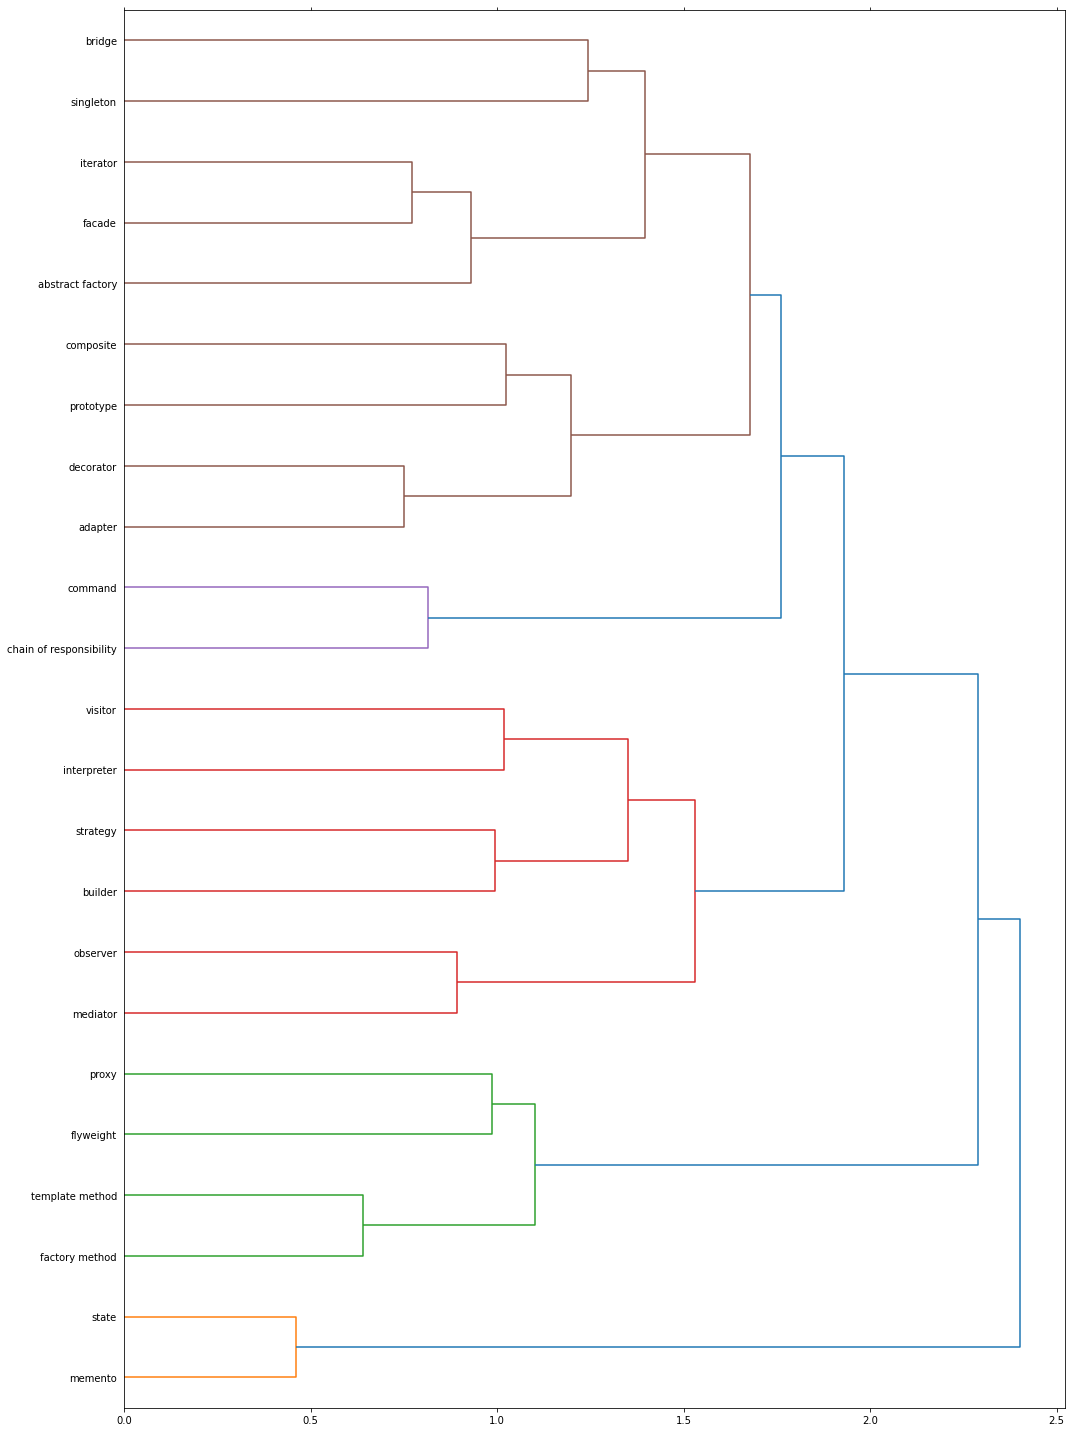

In [25]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=df_patterns['name'].to_numpy());

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

In [26]:
plt.close()

In [27]:
#strip any proper names from a text...unfortunately right now this is yanking the first word from a sentence too.
import string
def strip_proppers(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word.islower()]
    return "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in tokens]).strip()

In [28]:
#strip any proper nouns (NNP) or plural proper nouns (NNPS) from a text
from nltk.tag import pos_tag

def strip_proppers_POS(text):
    tagged = pos_tag(text.split()) #use NLTK's part of speech tagger
    non_propernouns = [word for word,pos in tagged if pos != 'NNP' and pos != 'NNPS']
    return non_propernouns

In [31]:
from gensim import corpora, models, similarities 

#remove proper names
%time preprocess = [strip_proppers(doc) for doc in df_patterns['overview']]

#tokenize
%time tokenized_text = [tokenize_and_stem(text) for text in preprocess]

#remove stop words
%time texts = [[word for word in text if word not in stopwords] for text in tokenized_text]

CPU times: user 144 ms, sys: 0 ns, total: 144 ms
Wall time: 147 ms
CPU times: user 181 ms, sys: 0 ns, total: 181 ms
Wall time: 183 ms
CPU times: user 19.9 ms, sys: 0 ns, total: 19.9 ms
Wall time: 19.8 ms


In [32]:
#create a Gensim dictionary from the texts
dictionary = corpora.Dictionary(texts)

#remove extremes (similar to the min/max df step used when creating the tf-idf matrix)
dictionary.filter_extremes(no_below=1, no_above=0.8)

#convert the dictionary to a bag of words corpus for reference
corpus = [dictionary.doc2bow(text) for text in texts]

In [33]:
%time lda = models.LdaModel(corpus, num_topics=3, id2word=dictionary, update_every=5, chunksize=10000, passes=100)

CPU times: user 2.85 s, sys: 41.8 ms, total: 2.89 s
Wall time: 2.86 s


In [34]:
lda.show_topics()

[(0,
  '0.025*"request" + 0.016*"interfac" + 0.014*"one" + 0.013*"client" + 0.012*"defin" + 0.011*"instanc" + 0.011*"state" + 0.011*"help" + 0.011*"subclass" + 0.010*"receiv"'),
 (1,
  '0.020*"state" + 0.018*"document" + 0.011*"charact" + 0.010*"creat" + 0.009*"flyweight" + 0.009*"applic" + 0.009*"editor" + 0.009*"proxi" + 0.008*"number" + 0.008*"differ"'),
 (2,
  '0.023*"subclass" + 0.016*"interfac" + 0.016*"defin" + 0.013*"widget" + 0.013*"creat" + 0.011*"list" + 0.011*"chang" + 0.009*"call" + 0.008*"differ" + 0.008*"let"')]

In [35]:
topics_matrix = lda.show_topics(formatted=False, num_words=20)
topics_matrix = np.array(topics_matrix)

topic_words = topics_matrix[:,1]
for i in topic_words:
    print([str(word) for word in i])
    print()

["('request', 0.024813963)", "('interfac', 0.016082352)", "('one', 0.014029288)", "('client', 0.013003084)", "('defin', 0.011976263)", "('instanc', 0.01146128)", "('state', 0.011451015)", "('help', 0.010946289)", "('subclass', 0.010945809)", "('receiv', 0.010436959)", "('differ', 0.009920574)", "('subsystem', 0.009920071)", "('algorithm', 0.008899952)", "('express', 0.008383788)", "('make', 0.008382669)", "('handl', 0.0073555033)", "('interpret', 0.0068442314)", "('provid', 0.006843938)", "('repres', 0.006842974)", "('depend', 0.0068401787)"]

["('state', 0.02009318)", "('document', 0.018066607)", "('charact', 0.011466034)", "('creat', 0.009950395)", "('flyweight', 0.009481526)", "('applic', 0.008826239)", "('editor', 0.008823832)", "('proxi', 0.008820021)", "('number', 0.008154628)", "('differ', 0.008002295)", "('store', 0.0075080628)", "('inform', 0.0074968305)", "('user', 0.007446544)", "('refer', 0.0068379454)", "('depend', 0.006837894)", "('need', 0.0068377433)", "('chang', 0.0068

<ipython-input-35-37f9c4e5b9d9>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  topics_matrix = np.array(topics_matrix)


In [36]:
# from Jonathan
print(df_gof.sort_values(by=['label', 'name']))

           x         y  label                     name
0  -0.224331  0.267797      0         abstract factory
5   0.030440  0.204624      0                  adapter
6  -0.289688  0.613788      0                   bridge
12  0.358000  0.483652      0  chain of responsibility
7   0.301786 -0.471594      0                composite
8  -0.008736  0.427222      0                decorator
9  -0.391170  0.370662      0                   facade
14 -0.554955 -0.177420      0              interpreter
15 -0.338985  0.144692      0                 iterator
16  0.170310  0.535308      0                 mediator
4  -0.640843  0.164247      0                singleton
20 -0.519982 -0.375088      0                 strategy
22  0.164916 -0.115788      0                  visitor
1  -0.290795 -0.486821      1                  builder
13  0.235700  0.100393      1                  command
2  -0.029290 -0.501548      1           factory method
10  0.403279 -0.312469      1                flyweight
3  -0.1754

In [37]:
# from Jonathan
from collections import Counter
patterns_gof_frame = pd.DataFrame(patterns_gof.items())
print(patterns_gof)
print(patterns_gof_frame)
patterns_gof_frame.iloc[:4].loc[:, 'overview':].agg(' '.join, axis=1).apply(lambda x: display(Counter(x.split()).most_common(8)))

{'name': 0            abstract factory
1                     builder
2              factory method
3                   prototype
4                   singleton
5                     adapter
6                      bridge
7                   composite
8                   decorator
9                      facade
10                  flyweight
11                      proxy
12    chain of responsibility
13                    command
14                interpreter
15                   iterator
16                   mediator
17                    memento
18                   observer
19                      state
20                   strategy
21            template method
22                    visitor
Name: name, dtype: object, 'cat': 0     2
1     2
2     2
3     2
4     2
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
Name: correct_category, dtype: int64, 'overview': 0     Provide an interface for cr

[]

[]

[]

[]

0    None
1    None
2    None
3    None
dtype: object

In [49]:
# Check for these words: client, class, application, extend, hierarchy, system, structure, behavior, differ, and execution. These words are important in determining the pattern category.
occurrences = []
special_words = [ 'client', 'class', 'application', 'extend', 'hierarchy', 'system', 'structure', 'behavior', 'differ', 'execution' ]

# print(patterns_gof_frame)

# for index, row in patterns_gof_frame.iterrows():
#   print(row)
#   pattern_info = []
#   pattern_info.append(row['name'])
#   for word in special_words:
#     pattern_info.append(row['name'].count(word))
#   occurrences.append(pattern_info)

#print(occurrences)

for word in special_words:
  occurrences.append(df_patterns['overview'].value_counts().iloc[word])

print(occurrences)

TypeError: ignored